## SARiSC Laboratorium

In [4]:
import gymnasium as gym
# import gym 
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter, PillowWriter
import io
# from gym.wrappers.monitor import Monitor
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3 import DQN
import imageio
import cv2

In [4]:

# Wyświetl wszystkie dostępne środowiska
print(gym.envs.registry.keys())

# Utwórz środowisko
env = gym.make('FrozenLake-v1', render_mode='rgb_array')
env = DummyVecEnv([lambda: env])

# Utwórz model
model = PPO('MlpPolicy', env, verbose=1)

# Trenuj model
model.learn(total_timesteps=10000)

# Zapisz model
model.save("ppo_FrozenLake")

# Załaduj model
# model = PPO.load("ppo_FrozenLake")

frames = []

# Testowanie modelu
obs = env.reset()
for _ in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    frame = env.render("rgb_array")
    frames.append(frame)



output_file = 'testowanie_modelu.mp4'
output_file_avi = 'testowanie_modelu.avi'  # Przykładowe rozszerzenie AVI
fps = 30  # Szybkość klatek na sekundę

# Zapisz animację do pliku AVI
imageio.mimsave(output_file_avi, frames, fps=fps)


dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV26Environment-v0', 'GymV21Environment-v0', 'Adventure-v0', 'AdventureDeterministic-v0', 'AdventureNoFrameskip-v0

In [15]:

# Wyświetl wszystkie dostępne środowiska
print(gym.envs.registry.keys())

# Utwórz środowisko
env = gym.make('FrozenLake8x8-v1', render_mode='rgb_array')
env = DummyVecEnv([lambda: env])

# Utwórz model
model = PPO('MlpPolicy', env, verbose=1)

timesteps_per_iteration = 8000
iterations = 100
# Trenuj model
frames = []
for _ in range(iterations):
    obs = env.reset()
    model.learn(total_timesteps=timesteps_per_iteration, reset_num_timesteps=False)
    obs = env.reset()
    for _ in range(10):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        frame = env.render("rgb_array")
        frames.append(frame)

# Zapisz model
model.save("ppo_FrozenLake")

output_file_avi = 'testowanie_modelu.avi'  # Przykładowe rozszerzenie AVI
fps = 10  # Szybkość klatek na sekundę

# Zapisz animację do pliku AVI
imageio.mimsave(output_file_avi, frames, fps=fps)

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV26Environment-v0', 'GymV21Environment-v0', 'Adventure-v0', 'AdventureDeterministic-v0', 'AdventureNoFrameskip-v0

Using cuda device
-----------------------------
| time/              |      |
|    fps             | 356  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 296         |
|    iterations           | 2           |
|    time_elapsed         | 13          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007072222 |
|    clip_fraction        | 0.0245      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -39.2       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0096     |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00924    |
|    value_loss           | 0.00395     |
-----------------------------------------
----------------

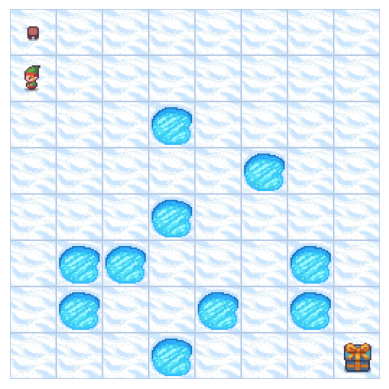

In [11]:
# Utwórz środowisko
env = gym.make('FrozenLake8x8-v1', render_mode='rgb_array')

# Zmień przestrzeń akcji na Box
# env = gym.wrappers.FlattenObservation(gym.wrappers.TimeLimit(env, max_episode_steps=env.spec.max_episode_steps))
# env = gym.wrappers.RescaleAction(env, min_action=0, max_action=1)
env = DummyVecEnv([lambda: env])

# Utwórz model
model = PPO('MlpPolicy', env, verbose=1)

# Trenuj model
model.learn(total_timesteps=10000)

# Zapisz model
model.save("ppo_FrozenLake")

# Załaduj model
# model = PPO.load("ppo_FrozenLake")

frames = []

# Testowanie modelu
obs = env.reset()
for _ in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    # env.render("human")

    frame = env.render("rgb_array")
    frames.append(frame)
# env.close()

first_frame = frames[1]
plt.imshow(first_frame)
plt.axis('off')  # Wyłączenie osi
plt.show()

output_file = 'testowanie_modelu.mp4'
output_file_avi = 'testowanie_modelu.avi'  # Przykładowe rozszerzenie AVI
fps = 10  # Szybkość klatek na sekundę

# Zapisz animację do pliku AVI
imageio.mimsave(output_file_avi, frames, fps=fps)

# Open cv nie działa dla mp4, nic nie działa dla mp4

# height, width, _ = frames[1].shape
# print(frames[0].shape)
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Kodek wideo (tutaj: MP4)
# fps = 30  # Szybkość klatek na sekundę

# # Utworzenie obiektu do zapisu wideo
# out = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

# # Zapis klatek do wideo
# for frame in frames:
#     out.write(frame)

# # Zamknięcie obiektu do zapisu wideo
# out.release()


In [2]:
# Utwórz środowisko
env = gym.make('FrozenLake-v1', render_mode='rgb_array')
env = DummyVecEnv([lambda: env])

# Utwórz model
model = PPO('MlpPolicy', env, verbose=1)

# Funkcja do aktualizacji animacji
def update(frame):
    global obs
    action, _ = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    # Konwertuj aktualny stan środowiska na obraz i dodaj do osi
    img = env.render(mode='rgb_array')[0]
    im.set_array(img)
    return [im]

# Trenuj model i generuj animację
obs = env.reset()

fig, ax = plt.subplots()
im = ax.imshow(env.render(mode='rgb_array')[0])

# Trenuj model i twórz animację jednocześnie
total_timesteps = 1000
timesteps_per_update = 100

def train_and_animate(i):
    if i > 0:
        model.learn(total_timesteps=timesteps_per_update, reset_num_timesteps=False)
    return update(i)

ani = FuncAnimation(fig, train_and_animate, frames=total_timesteps // timesteps_per_update, interval=50, blit=True)

# Zapisz animację do pliku
writer = PillowWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('training_animation.gif', writer=writer)

# Testowanie modelu
obs = env.reset()
for _ in range(10):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

Using cuda device


AssertionError: The algorithm only supports (<class 'gym.spaces.box.Box'>, <class 'gym.spaces.discrete.Discrete'>, <class 'gym.spaces.multi_discrete.MultiDiscrete'>, <class 'gym.spaces.multi_binary.MultiBinary'>) as action spaces but Discrete(4) was provided

In [8]:
env_id = 'CartPole-v1'  # przykład środowiska, można użyć innych
env = gym.make(env_id)
# Monitorowanie środowiska
save_path = "./gym-results"
env = Monitor(env, save_path, force=True)

# Inicjalizacja modelu
model = PPO("MlpPolicy", env, verbose=1)

# Trening modelu
model.learn(total_timesteps=10000)

# Generowanie animacji
animation_path = "./gym-results/openaigym.video.%s.video000000.mp4" % env.file_infix
video = io.open(animation_path, 'r+b').read()
plt.figure()
plt.title('Learning animation')
plt.imshow(video)
plt.axis('off')
plt.show()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


AssertionError: The algorithm only supports (<class 'gym.spaces.box.Box'>, <class 'gym.spaces.discrete.Discrete'>, <class 'gym.spaces.multi_discrete.MultiDiscrete'>, <class 'gym.spaces.multi_binary.MultiBinary'>) as action spaces but Discrete(2) was provided

In [7]:
housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

# Dodanie kolumny targetu
housing_df['target'] = housing.target

In [8]:
profile = ProfileReport(housing_df, title='California Housing Prices - EDA Report', explorative=True)
profile.to_file("california_housing_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

In [10]:
linear_reg = LinearRegression()
decision_tree_reg = RandomForestRegressor()
neural_network_reg = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)

linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
neural_network_reg.fit(X_train, y_train)

linear_reg_pred = linear_reg.predict(X_test)
decision_tree_reg_pred = decision_tree_reg.predict(X_test)
neural_network_reg_pred = neural_network_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
decision_tree_reg_mse = mean_squared_error(y_test, decision_tree_reg_pred)
neural_network_reg_mse = mean_squared_error(y_test, neural_network_reg_pred)

print("Mean Squared Error (MSE) dla regresji liniowej:", linear_reg_mse)
print("Mean Squared Error (MSE) dla drzewa decyzyjnego:", decision_tree_reg_mse)
print("Mean Squared Error (MSE) dla modelu opartego na sieciach neuronowych:", neural_network_reg_mse)


Mean Squared Error (MSE) dla regresji liniowej: 0.5558915986952425
Mean Squared Error (MSE) dla drzewa decyzyjnego: 0.25320457943178676
Mean Squared Error (MSE) dla modelu opartego na sieciach neuronowych: 0.6313990874886894


In [11]:
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
decision_tree_reg_mae = mean_absolute_error(y_test, decision_tree_reg_pred)
neural_network_reg_mae = mean_absolute_error(y_test, neural_network_reg_pred)

linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_pred))
decision_tree_reg_rmse = np.sqrt(mean_squared_error(y_test, decision_tree_reg_pred))
neural_network_reg_rmse = np.sqrt(mean_squared_error(y_test, neural_network_reg_pred))

linear_reg_r2 = r2_score(y_test, linear_reg_pred)
decision_tree_reg_r2 = r2_score(y_test, decision_tree_reg_pred)
neural_network_reg_r2 = r2_score(y_test, neural_network_reg_pred)

print("Mean Absolute Error (MAE):")
print("Regresja liniowa:", linear_reg_mae)
print("Drzewo decyzyjne:", decision_tree_reg_mae)
print("Sieć neuronowa:", neural_network_reg_mae)

print("\nRoot Mean Squared Error (RMSE):")
print("Regresja liniowa:", linear_reg_rmse)
print("Drzewo decyzyjne:", decision_tree_reg_rmse)
print("Sieć neuronowa:", neural_network_reg_rmse)

print("\nR^2 score:")
print("Regresja liniowa:", linear_reg_r2)
print("Drzewo decyzyjne:", decision_tree_reg_r2)
print("Sieć neuronowa:", neural_network_reg_r2)

Mean Absolute Error (MAE):
Regresja liniowa: 0.5332001304956989
Drzewo decyzyjne: 0.32685366124031023
Sieć neuronowa: 0.602894055920684

Root Mean Squared Error (RMSE):
Regresja liniowa: 0.7455813830127751
Drzewo decyzyjne: 0.5031943753976059
Sieć neuronowa: 0.7946062468220908

R^2 score:
Regresja liniowa: 0.5757877060324521
Drzewo decyzyjne: 0.8067743859846794
Sieć neuronowa: 0.5181663908192364
